In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('totalData.csv')
df

C:\Users\annab\AppData\Local\Temp\ipykernel_5432\3020583216.py:1: DtypeWarning: Columns (4,74,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('totalData.csv')


,BuyerAgentAOR,ListAgentAOR,Flooring,ViewYN,WaterfrontYN,BasementYN,PoolPrivateYN,OriginalListPrice,ListingKey,ListAgentEmail,...,MainLevelBedrooms,NewConstructionYN,GarageSpaces,HighSchoolDistrict,PostalCode,AssociationFee,LotSizeSquareFeet,MiddleOrJuniorSchoolDistrict,latfilled,lonfilled
0,RanchoSoutheast,RanchoSoutheast,NaN,True,NaN,NaN,True,1250.0,543227709,pat@patowen.com,...,0.0,False,0.0,Menifee Union,92587,0.0,12197.00,NaN,True,True
1,BeverlyHillsGreaterLA,BeverlyHillsGreaterLA,NaN,True,NaN,NaN,NaN,2100000.0,531525691,andrew@epicpropertygroup.com,...,NaN,False,NaN,NaN,91206,NaN,437284.00,NaN,False,False
2,JoshuaTreeGateway,JoshuaTreeGateway,NaN,True,NaN,NaN,NaN,179000.0,531017430,bryan@jtmodern.com,...,NaN,False,NaN,NaN,92252,0.0,875556.00,NaN,True,True
3,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,14500.0,530411639,trustdee@aol.com,...,NaN,False,NaN,NaN,92345,NaN,871200.00,NaN,True,True
4,Southland,Southland,NaN,True,NaN,NaN,NaN,720000.0,526412917,karen@goldenoakrealty.com,...,NaN,False,NaN,NaN,93510,0.0,2576054.00,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139941,OrangeCounty,OrangeCounty,"Carpet,Wood",True,NaN,NaN,False,2650000.0,1016328426,erin.oconnor.re@gmail.com,...,3.0,True,2.0,Santa Ana Unified,92660,1231.0,NaN,NaN,NaN,NaN
139942,NorthSanLuisObispo,NorthSanLuisObispo,NaN,True,NaN,NaN,NaN,125000.0,1014940572,jimclaassen@gmail.com,...,NaN,False,NaN,NaN,93422,0.0,101407.68,NaN,NaN,NaN
139943,LakeCounty,LakeCounty,NaN,True,NaN,NaN,NaN,14999.0,1014478574,veracrabtreerealty@gmail.com,...,NaN,False,NaN,NaN,95422,0.0,5929.00,NaN,NaN,NaN
139944,HighDesert,HighDesert,NaN,True,NaN,NaN,NaN,139900.0,1013494301,kim.hdrealtysource@hotmail.com,...,NaN,False,NaN,NaN,92301,NaN,3323628.00,NaN,NaN,NaN


In [3]:
# using the features that claire picked out

features = ['PoolPrivateYN', 'ViewYN', 'DaysOnMarket', 'TaxAnnualAmount', 'BedroomsTotal', 'ClosePrice', 
'BathroomsTotalInteger', 'YearBuilt', 'BasementYN', 'LivingArea', 'PropertyType', 'PostalCode', 'AttachedGarageYN', 'Flooring']
drop_columns = df.columns.difference(features)

In [4]:
# check to ensure what columns i'm dropping

drop_columns

Index(['AboveGradeFinishedArea', 'AssociationFee', 'AssociationFeeFrequency',
       'BelowGradeFinishedArea', 'BuilderName', 'BuildingAreaTotal',
       'BusinessType', 'BuyerAgentAOR', 'BuyerAgentFirstName',
       'BuyerAgentLastName', 'BuyerAgentMlsId', 'BuyerOfficeAOR',
       'BuyerOfficeName', 'City', 'CloseDate', 'CoBuyerAgentFirstName',
       'CoListAgentFirstName', 'CoListAgentLastName', 'CoListOfficeName',
       'ContractStatusChangeDate', 'CountyOrParish', 'CoveredSpaces',
       'ElementarySchool', 'ElementarySchoolDistrict', 'FireplaceYN',
       'FireplacesTotal', 'GarageSpaces', 'HighSchool', 'HighSchoolDistrict',
       'Latitude', 'Levels', 'ListAgentAOR', 'ListAgentEmail',
       'ListAgentFirstName', 'ListAgentFullName', 'ListAgentLastName',
       'ListOfficeName', 'ListPrice', 'ListingContractDate', 'ListingId',
       'ListingKey', 'ListingKeyNumeric', 'Longitude', 'LotSizeAcres',
       'LotSizeArea', 'LotSizeDimensions', 'LotSizeSquareFeet', 'MLSAreaMajor',
 

In [5]:
df = df.drop(columns = drop_columns)
df

,Flooring,ViewYN,BasementYN,PoolPrivateYN,ClosePrice,PropertyType,LivingArea,DaysOnMarket,TaxAnnualAmount,AttachedGarageYN,YearBuilt,BathroomsTotalInteger,BedroomsTotal,PostalCode
0,NaN,True,NaN,True,1250.0,ResidentialLease,120.0,900,NaN,NaN,2006.0,1.0,1.0,92587
1,NaN,True,NaN,NaN,1100000.0,Land,NaN,341,NaN,NaN,NaN,0.0,NaN,91206
2,NaN,True,NaN,NaN,90000.0,Land,NaN,1031,NaN,NaN,NaN,NaN,NaN,92252
3,NaN,True,NaN,NaN,14500.0,Land,NaN,276,NaN,NaN,NaN,NaN,NaN,92345
4,NaN,True,NaN,NaN,375000.0,Land,NaN,992,NaN,NaN,NaN,NaN,NaN,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139941,"Carpet,Wood",True,NaN,False,2650000.0,Residential,2219.0,10,NaN,False,2023.0,3.0,3.0,92660
139942,NaN,True,NaN,NaN,90000.0,Land,NaN,924,NaN,NaN,NaN,NaN,NaN,93422
139943,NaN,True,NaN,NaN,8000.0,Land,NaN,597,NaN,NaN,NaN,NaN,NaN,95422
139944,NaN,True,NaN,NaN,140000.0,Land,NaN,915,NaN,NaN,NaN,NaN,NaN,92301


In [6]:
df

,Flooring,ViewYN,BasementYN,PoolPrivateYN,ClosePrice,PropertyType,LivingArea,DaysOnMarket,TaxAnnualAmount,AttachedGarageYN,YearBuilt,BathroomsTotalInteger,BedroomsTotal,PostalCode
0,NaN,True,NaN,True,1250.0,ResidentialLease,120.0,900,NaN,NaN,2006.0,1.0,1.0,92587
1,NaN,True,NaN,NaN,1100000.0,Land,NaN,341,NaN,NaN,NaN,0.0,NaN,91206
2,NaN,True,NaN,NaN,90000.0,Land,NaN,1031,NaN,NaN,NaN,NaN,NaN,92252
3,NaN,True,NaN,NaN,14500.0,Land,NaN,276,NaN,NaN,NaN,NaN,NaN,92345
4,NaN,True,NaN,NaN,375000.0,Land,NaN,992,NaN,NaN,NaN,NaN,NaN,93510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139941,"Carpet,Wood",True,NaN,False,2650000.0,Residential,2219.0,10,NaN,False,2023.0,3.0,3.0,92660
139942,NaN,True,NaN,NaN,90000.0,Land,NaN,924,NaN,NaN,NaN,NaN,NaN,93422
139943,NaN,True,NaN,NaN,8000.0,Land,NaN,597,NaN,NaN,NaN,NaN,NaN,95422
139944,NaN,True,NaN,NaN,140000.0,Land,NaN,915,NaN,NaN,NaN,NaN,NaN,92301


In [7]:
# decided to steal brandon's data cleaning methods

# fill numeric columns with median
num_cols = ["TaxAnnualAmount", "BedroomsTotal", 
            "BathroomsTotalInteger", "YearBuilt", "LivingArea"]
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

binary_cols = ["PoolPrivateYN", "ViewYN", "BasementYN", "AttachedGarageYN"]

# fill NaNs with "N" before conversion
df[binary_cols] = df[binary_cols].fillna("N")

# convert "Y" into 1, "N" into 0, and change type to integer
df[binary_cols] = df[binary_cols].replace({"Y": 1, "N": 0}).astype(int)

# fill categorical variables with "Unknown"
cat_cols = ["PropertyType", "Flooring", "PostalCode"]
df[cat_cols] = df[cat_cols].fillna("Unknown")

df["PostalCode"] = df["PostalCode"].astype("category").cat.codes
df["PropertyType"] = df["PropertyType"].astype("category").cat.codes
df["Flooring"] = df["Flooring"].astype("category").cat.codes

In [8]:
# taking the log of y to normalize data a little more and since there isn't likely a completely linear pattern

df["ClosePrice"] = np.log1p(df["ClosePrice"])

X = df.drop(columns=["ClosePrice"])
Y = df["ClosePrice"]

In [9]:
# just checking the shape to ensure it works
print(X.shape)
print(Y.shape)

(139946, 13)
(139946,)


In [10]:
import sklearn

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
# checking data dimensions

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((111956, 13), (111956,), (27990, 13), (27990,))

In [13]:
# my model kept giving me an error that my y input had nan values...
Y_train = Y_train.dropna()

In [14]:
Y_test = Y_test.dropna()

In [15]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((111956, 13), (111955,), (27990, 13), (27990,))

In [16]:
X_train = X_train.drop(index = 1192)
X_train

,Flooring,ViewYN,BasementYN,PoolPrivateYN,PropertyType,LivingArea,DaysOnMarket,TaxAnnualAmount,AttachedGarageYN,YearBuilt,BathroomsTotalInteger,BedroomsTotal,PostalCode
63018,247,1,0,1,5,2807.0,29,7024.5,1,2002.0,3.0,4.0,675
31898,213,1,0,1,5,2660.0,7,7024.5,1,2001.0,3.0,4.0,972
37221,79,0,0,0,5,1558.0,32,7024.5,1,1990.0,3.0,3.0,1695
46601,154,1,0,0,5,780.0,21,7024.5,0,1986.0,2.0,2.0,797
101699,247,1,0,0,5,2242.0,5,7024.5,1,1984.0,3.0,4.0,1073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21834,248,0,0,0,5,940.0,75,7024.5,1,1991.0,2.0,2.0,1512
84281,160,1,0,0,5,1567.0,24,7024.5,0,1981.0,3.0,2.0,429
129431,247,0,0,0,5,900.0,9,7024.5,1,1948.0,1.0,2.0,2074
1148,247,0,0,0,5,1195.0,3,7024.5,0,1956.0,2.0,3.0,2061


In [17]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [18]:
model.fit(X_train, Y_train)

LinearRegression()

In [19]:
Y_pred = model.predict(X_test)

In [20]:
# for some reason i kept getting an error that my inputs had nulls (when I ran the check for coefficients, intercepts, MSE below)
# so i decided to convert all the nans to zero... thats probably fine right

Y_pred = np.nan_to_num(Y_pred, nan=0)
Y_test = np.nan_to_num(Y_test, nan=0)

In [21]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE):', mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2):', r2_score(Y_test, Y_pred))

Coefficients: [-2.60678953e-03 -3.59686788e-02  2.48618256e-01  2.09199976e-01
 -1.22327979e+00 -2.21287777e-09 -3.08987606e-03  7.84133294e-06
  6.98276703e-01 -1.12109374e-02  2.49682049e-01  6.42025488e-02
  1.26463990e-04]
Intercept: 40.37152091646819
Mean squared error (MSE): 2.9641789953051525
Coefficient of determination (R^2): 0.47270655978776466


In [22]:
# these features in order correspond to these coefficients: 
# Coefficients: [-3.28848879e-03 -1.29558976e-02  2.73188242e-01  2.67163709e-01 -1.51750439e+00 
# -1.44866499e-09 -3.95790060e-03  1.32691375e-05 8.51706595e-01 
# -1.40167777e-02  3.12928710e-01  7.44687522e-02 1.52858993e-04]
print(X.columns)

Index(['Flooring', 'ViewYN', 'BasementYN', 'PoolPrivateYN', 'PropertyType',
       'LivingArea', 'DaysOnMarket', 'TaxAnnualAmount', 'AttachedGarageYN',
       'YearBuilt', 'BathroomsTotalInteger', 'BedroomsTotal', 'PostalCode'],
      dtype='object')


<Axes: >

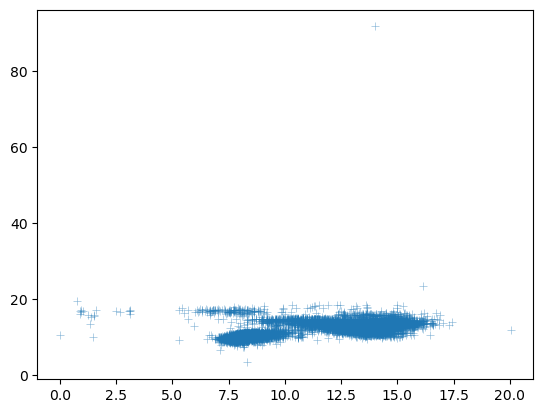

In [24]:
# comparing actual data w test data

sns.scatterplot(x=Y_test, y=Y_pred, marker = '+', alpha = 0.5)